""

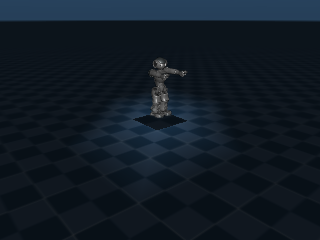

In [21]:
import mujoco
import mediapy as media
import numpy as np
import matplotlib.pyplot as plt 

# Load the scene XML file
model = mujoco.MjModel.from_xml_path("scene.xml")
data = mujoco.MjData(model)

# Make renderer, render and show the pixels
with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)

  media.show_image(renderer.render())

Available actuators: ['HeadYaw', 'HeadPitch', 'LHipYawPitch', 'LHipRoll', 'LHipPitch', 'LKneePitch', 'LAnklePitch', 'LAnkleRoll', 'RHipRoll', 'RHipPitch', 'RKneePitch', 'RAnklePitch', 'RAnkleRoll', 'LShoulderPitch', 'LShoulderRoll', 'LElbowYaw', 'LElbowRoll', 'LWristYaw', 'RShoulderPitch', 'RShoulderRoll', 'RElbowYaw', 'RElbowRoll', 'RWristYaw']


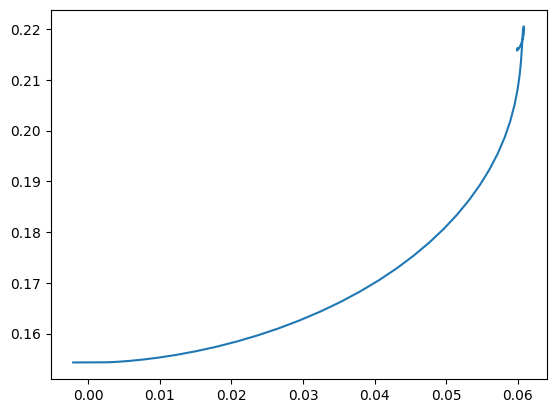

In [22]:

# Get actuator names and their indices
actuator_names = [model.actuator(i).name for i in range(model.nu)]
print("Available actuators:", actuator_names)

seconds = 3
fps = 60
frames = []

final_knee_angle = 2
initial_knee_angle = 0

tracked_positions_x = []
tracked_positions_y = []

# Set LKneePitch actuator to 0
data.ctrl[actuator_names.index("LKneePitch")] = 0

scene_option = mujoco.MjvOption()
camera = mujoco.MjvCamera()

# Configure camera parameters
camera.type = mujoco.mjtCamera.mjCAMERA_FREE
camera.distance = 0.3  # Adjust this value to zoom in/out
camera.azimuth = 90   # Camera angle around the vertical axis
camera.elevation = -10  # Camera angle above the horizontal plane

# Render again to see the fixed robot
with mujoco.Renderer(model) as renderer:
    for _ in range(seconds * fps):
        # Set root joint position and acceleration to zero
        data.qpos[0:6] = 0  # First 6 DoFs are root position/orientation
        data.qpos[2] = 0.4
        # data.qpos[3] = 0.3
        data.qacc[0:6] = 0  # Zero acceleration for root joint
        data.qvel[0:6] = 0  # Also zero velocity for root joint

        data.ctrl[actuator_names.index("LKneePitch")] = 2

        mujoco.mj_step(model, data)

        tracked_position = data.site_xpos[model.site("tracking_site").id]
        camera.lookat = tracked_position
        mujoco.mj_forward(model, data)

        tracked_positions_x.append(tracked_position[0])
        tracked_positions_y.append(tracked_position[2])

        renderer.update_scene(data, scene_option=scene_option, camera=camera)

        frames.append(renderer.render())

media.show_video(frames, fps=fps)

plt.plot(tracked_positions_x, tracked_positions_y)
plt.show()
